In [10]:
# кол-во бит

len(bin(31)[2:] * 3 + bin(63)[2:])


50

In [33]:
# определяем центральный пиксель

from skimage.io import imread, imsave, imshow
import numpy as np

img = imread(r'C:\Users\AmanovRA\Downloads\tiger-color.png')

green = (102, 204, 102)

centr = (np.median(np.arange(img.shape[0], dtype=np.int32)), np.median(np.arange(img.shape[1], dtype=np.int32)))

img[int(centr[0]), int(centr[1])] = green

imsave('out.png', img)

In [63]:
# вычисляем толщины рамки

import numpy as np
from skimage.io import imread, imsave

img = imread('tiger-border.png')

def get_centr(img):
    centr = list(map(np.median, map(np.arange, [img.shape[0], img.shape[1]])))
    centr = [int(i) for i in centr]
    return centr



def border_width(start, stop, img, const='column'):
    centr = get_centr(img)
    color = img[0, 0]
    cnt = 1
    if stop > start:
        for pixel in range(start + 1, stop):
            if const == 'column':
                next_pixel = img[pixel, centr[1]]
                if np.equal(next_pixel, color).all():
                    cnt += 1
                else:
                    break
            else:
                next_pixel = img[centr[0], pixel]
                if np.equal(next_pixel, color).all():
                    cnt += 1
                else:
                    break
    else:
        for pixel in range(start - 2, stop, -1):
            if const == 'column':
                next_pixel = img[pixel, centr[1]]
                if np.equal(next_pixel, color).all():
                    cnt += 1
                else:
                    break
            else:
                next_pixel = img[centr[0], pixel]
                if np.equal(next_pixel, color).all():
                    cnt += 1
                else:
                    break        
    return cnt

left = border_width(0, img.shape[1], img, const='row')
top = border_width(0, img.shape[0], img, const='column')
right = border_width(img.shape[1], 0, img, const='row')
down = border_width(img.shape[0], 0, img, const='column')

print(*[left, top, right, down])

1 39 25 7


In [86]:
# получаем негатив изображения

import numpy as np
from skimage.io import imread, imsave, imshow
from skimage import img_as_float

img = imread('img.png')

img = img_as_float(img)

img = 1 - img

imsave('out_img.png', img)



Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [89]:
np.arange(4).reshape((2,2))

array([[-1, -2],
       [-3, -4]], dtype=int32)

In [100]:
# меняем каналы rgb местами

import numpy as np
from skimage.io import imread, imsave, imshow
from skimage import img_as_float

img = imread('img.png')

r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

rgb = np.dstack((r, g, b))

brg = np.dstack((b, r, g))

imsave('out_img.png', img)

# Сопоставление фотографий Прокудина-Горского

In [26]:
import numpy as np
from skimage.io import imread, imsave, imshow
from skimage import img_as_float

img = imread('00.png')
img = img_as_float(img)

def img_row_split(img, parts=3):
    
    row_count = img.shape[0] // parts
    arr = []
    first_row = 0
    last_row = row_count
    for cut in range(parts):
        arr.append(img[first_row : last_row, :])
        first_row, last_row = last_row, last_row + row_count
    return [arr, row_count]


result = img_row_split(img)
b, g, r = result[0]
slide_size = result[1]


def delete_borders(img, width_percent=7):
    
    row_border = int(img.shape[0] // (100 / width_percent))
    column_border = int(img.shape[1] // (100 / width_percent))
    
    return img[row_border : img.shape[0] - row_border, column_border : img.shape[1] - column_border]

b, g, r = map(delete_borders, [b, g, r])

def maximize_correlation(a, b):
    
    def correlation(x ,y):
        
        return (x * y).sum()
    
    max_row_offset = a.shape[0]
    max_column_offset = a.shape[1]
    
    arr = []
    for row_offset in range(-15, 15):
        for column_offset in range(-15, 15):
            offset_a = np.roll(a, (row_offset, column_offset), (0, 1))
            arr.append((row_offset, column_offset, correlation(offset_a, b)))
    arr = sorted(arr, key=lambda x: x[2], reverse=True)
    return arr[0]

off_b = maximize_correlation(b, g)
off_r = maximize_correlation(r, g)


In [1]:
import numpy as np
from skimage.io import imread, imsave, imshow
from skimage import img_as_float

def align(img, g_coord):
    row_g, col_g = g_coord
    img = imread(img)
    img = img_as_float(img)

    def img_row_split(img, parts=3):

        row_count = img.shape[0] // parts
        arr = []
        first_row = 0
        last_row = row_count
        for cut in range(parts):
            arr.append(img[first_row : last_row, :])
            first_row, last_row = last_row, last_row + row_count
        return [arr, row_count]


    result = img_row_split(img)
    b, g, r = result[0]
    slide_size = result[1]


    def delete_borders(img, width_percent=7):

        row_border = int(img.shape[0] // (100 / width_percent))
        column_border = int(img.shape[1] // (100 / width_percent))

        return img[row_border : img.shape[0] - row_border, column_border : img.shape[1] - column_border]

    b, g, r = map(delete_borders, [b, g, r])

    def maximize_correlation(a, b):

        def correlation(x ,y):

            return (x * y).sum()

        max_row_offset = a.shape[0]
        max_column_offset = a.shape[1]

        arr = []
        for row_offset in range(-15, 15):
            for column_offset in range(-15, 15):
                offset_a = np.roll(a, (row_offset, column_offset), (0, 1))
                arr.append((row_offset, column_offset, correlation(offset_a, b)))
        arr = sorted(arr, key=lambda x: x[2], reverse=True)
        return arr[0]

    off_b = maximize_correlation(b, g)
    off_r = maximize_correlation(r, g)
    
    row_b = row_g - slide_size - off_b[0]
    col_b = col_g - off_b[1]
    row_r = row_g + slide_size - off_r[0]
    col_r = col_g - off_r[1]
    
    return (row_b, col_b), (row_r, col_r)
    
align('00.png', (508,237))        


((153, 236), (857, 238))

In [86]:
# Устойчивый автоконтраст черно-белого изображения

from skimage.io import imread, imsave
import skimage
from skimage import img_as_float
import numpy as np
import pandas as pd

img = imread('b828b7f5c05b95b213a513040c132efd.jpg')

print(img)

img = skimage.color.rgb2gray(img)

size = img.shape

def f(x, minimum, maximum):
  
  return (x - minimum) * (255 / (maximum - minimum))

ravel = img. ravel()

new_ravel = ravel.copy()

ravel. sort()

minimum = np. percentile(ravel, 20, interpolation='higher')

maximum = np. quantile(ravel, 0.9995, interpolation='lower')

vfunc = np.vectorize(f)

new_img = vfunc(new_ravel, minimum, maximum)

new_img = new_img.reshape(size)

new_img = np.clip(new_img, 0, 255)

new_img = new_img.astype('uint8')

#imshow(new_img)

imsave('Poline_cat2.jpg', new_img)



[[[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [7 7 7]
  [8 8 8]
  [7 7 7]]

 [[3 3 3]
  [3 3 3]
  [4 4 4]
  ...
  [6 6 6]
  [6 6 6]
  [6 6 6]]

 [[2 2 2]
  [3 3 3]
  [4 4 4]
  ...
  [4 4 4]
  [4 4 4]
  [4 4 4]]

 ...

 [[5 5 5]
  [4 4 4]
  [3 3 3]
  ...
  [4 4 4]
  [5 5 5]
  [5 5 5]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [4 4 4]
  [4 4 4]
  [4 4 4]]

 [[1 1 1]
  [2 2 2]
  [2 2 2]
  ...
  [4 4 4]
  [4 4 4]
  [3 3 3]]]


In [68]:
# Устойчивый цветной автоконтраст

from skimage.io import imread, imsave, imshow
from skimage import img_as_float, img_as_ubyte
import numpy as np
import pandas as pd

img = imread('b828b7f5c05b95b213a513040c132efd.jpg')

img = img_as_float(img)

YUV =np.array([0.2126, 0.7152, 0.0722, -0.0999, -0.3360, 0.4360, 0.6150, -0.5586, -0.0563]).reshape((3, 3))

img_yuv = img@YUV.T

img_Y, img_U, img_V = [img_yuv[:, :, i] for i in range(3)]

minimum = np. percentile(img_Y, 1, interpolation='higher')

maximum = np. percentile(img_Y, 90, interpolation='lower')

img_Y = (img_Y - minimum) * (1 / (maximum - minimum))

img_Y = np.clip(img_Y, 0, 1)

R = img_Y + 1.2803 * img_V
G = img_Y - 0.2148 * img_U - 0.3805 * img_V
B = img_Y + 2.1279 * img_U

img_rbg = np.dstack((R, G, B))



img_rbg = np.clip(img_rbg, 0, 1)

img_rbg = img_as_ubyte(img_rbg)

imsave('Poline_cat.jpg', img_rbg)



In [1]:
# Баланс белого. Модель «серого мира»

from skimage.io import imread, imsave, imshow
from skimage import img_as_float, img_as_ubyte
import numpy as np

img = img_as_float(imread('img.png'))

r_avg, g_avg, b_avg = [img[:, :, i].mean() for i in range(3)]

avg = sum([r_avg, g_avg, b_avg]) / 3

r_avg, g_avg, b_avg = map(lambda x: x / avg, [r_avg, g_avg, b_avg])

r, g, b = [img[:, :, i] / [r_avg, g_avg, b_avg][i] for i in range(3)]

r, g, b = [np.clip(i, 0, 1) for i in (r, g, b)]

out = np. dstack((r, g, b))

imsave('out_img.png', out)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [47]:
# Выравнивание гистограммы черно-белого изображения


from skimage.io import imread, imsave, imshow
from skimage import img_as_float, img_as_ubyte
import numpy as np
from tqdm import tqdm
from collections import Counter


img = imread('landscape.png')

all_elements_count = np.prod(img.shape[:2])

img_ravel = img.ravel()

arr = []
# new_arr = 0
# for i, j in tqdm(enumerate(img_ravel)):
#     if isinstance(new_arr, int):
#         new_arr = img_ravel.copy()
#     c = np.unique(new_arr[new_arr <= j], return_counts=True) 
#     new_element = round(((c[1].sum() - c[1].min()) / (all_elements_count - 1)) * 255)
#     new_arr[i] = new_element
    
    

c = Counter(img_ravel)

cdf_dict = {key : sum([val1 for key1, val1 in c.items() if key1 <= key]) for key in c.keys()}

def f(x):
    
    cdf_min = min([val for key, val in cdf_dict.items() if key <= x])  # минимум надо искать не от изначальной гистограммы, а именно от функции распределения
    return round(((cdf_dict[x] - cdf_min) / (all_elements_count - 1)) * 255)

f_dict = dict(zip(cdf_dict.keys(), map(f, cdf_dict.keys())))

f_img_ravel = np.array(list(map(lambda x: f_dict[x], img_ravel)))

#imshow(f_img_ravel.reshape((img.shape[:2])).astype('uint8'))

#imshow(f_img_ravel)

print(img.max(), img.min(), img.shape)

#np.array(np.unique(f_img_ravel.reshape((img.shape[:2])), return_counts=True), dtype=int)

208 114 (683, 1024)


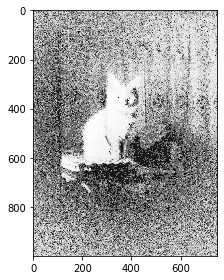

In [65]:
# Выравнивание гистограммы черно-белого изображения
# пример с кошкой


from skimage.io import imread, imsave, imshow
import skimage
from skimage import img_as_float, img_as_ubyte
import numpy as np
from tqdm import tqdm
from collections import Counter


img = imread('b828b7f5c05b95b213a513040c132efd.jpg')

img = skimage.color.rgb2gray(img)

all_elements_count = np.prod(img.shape[:2])

img_ravel = img.ravel()



arr = []
# new_arr = 0
# for i, j in tqdm(enumerate(img_ravel)):
#     if isinstance(new_arr, int):
#         new_arr = img_ravel.copy()
#     c = np.unique(new_arr[new_arr <= j], return_counts=True) 
#     new_element = round(((c[1].sum() - c[1].min()) / (all_elements_count - 1)) * 255)
#     new_arr[i] = new_element
    
    

c = Counter(img_ravel)



cdf_dict = {key : sum([val1 for key1, val1 in c.items() if key1 <= key]) for key in c.keys()}



def f(x):
    
    cdf_min = min([val for key, val in cdf_dict.items() if key <= x])  # минимум надо искать не от изначальной гистограммы, а именно от функции распределения
    return round(((cdf_dict[x] - cdf_min) / (all_elements_count - 1)) * 255)

f_dict = dict(zip(cdf_dict.keys(), map(f, cdf_dict.keys())))



f_img_ravel = np.array(list(map(lambda x: f_dict[x], img_ravel)))

imshow(f_img_ravel.reshape((img.shape[:2])).astype('uint8'))




#np.array(np.unique(f_img_ravel.reshape((img.shape[:2])), return_counts=True), dtype=int)




In [34]:
# свертка и корреляция изображения

import scipy
import numpy as np
from skimage.io import imshow
from skimage import img_as_float, img_as_ubyte

img = np.array([[0, -8, -3, -2], [1, 9, -8, 0], [9, -4, 5, -9], [6, -4, 6, 3]])

core = np.array([[4, -5, 4], [-6, -8, -2], [1, 5, 5]])

convolve_core = np.flip(np.flip(core, 1), 0)

[np.sum((img[:3, :3] * convolve_core)), np.sum((img[:3, 1:] * convolve_core)), np.sum((img[1:, :3] * convolve_core)), np.sum((img[1:, 1:] * convolve_core))]

[7, -88, 94, -7]

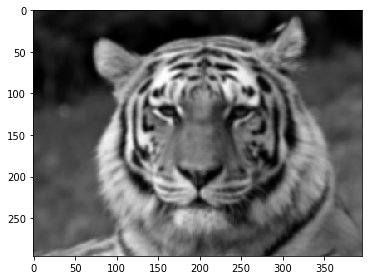

In [28]:
# Операция свертки. Линейные фильтры
import scipy
import numpy as np
from skimage.io import imshow, imread, imsave
from skimage import img_as_float, img_as_ubyte

img = imread('tiger-gray-small.png')
img = img_as_float(img)

imshow(img_as_ubyte(scipy.signal.correlate2d(img, np.ones(shape=(5, 5)), mode='valid') / 25))

#scipy.signal.correl(img, convolve_core)

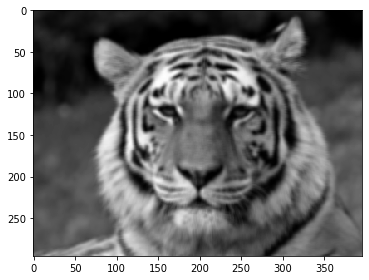

In [37]:
# Операция свертки. Линейные фильтры
# не знай чем отличается
import scipy
import numpy as np
from skimage.io import imshow, imread, imsave
from skimage import img_as_float, img_as_ubyte

img = imread('tiger-gray-small.png')

imshow((scipy.signal.convolve2d(img, np.ones(shape=(5, 5)), mode='valid') / 25).astype('uint8'))

#scipy.signal.correl(img, convolve_core)

In [1]:
# Размер гауссовского фильтра

# Какого размера (K) должен быть гауссовский фильтр для sigma σ = 4?
import math
def gauss(s, x, y):
    
    return (1 / ((2 * math.pi) * s ** 2)) * math.exp((- x ** 2 - y ** 2) / (2 * s ** 2))



In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data  = pd.DataFrame({'X' : [1, 2, 5], 'y': [7, 13, 31]})
lr = LinearRegression()
lr.fit(pd.DataFrame(data.X), data.y)
data1  = pd.DataFrame({'X' : [4]})
lr.predict(data1)


# Люди так определяют, фиг знает почему

# a = int(round(sigma*6)+1)


array([25.])

In [16]:
'''Ядро гауссовского фильтра

На стандартный вход подается параметр \sigmaσ гауссовского фильтра. 
Подсчитайте и напечатайте на стандартый вывод элементы ядра. Для подсчета значений функции 
Гаусса используйте функцию из предыдущего задания. \sigmaσ может быть нецелым, тогда округлите 
KK с помощью функции round. Элементы ядра выводите с 5 цифрами после запятой.'''

sigma = 0.33
a = int(round(sigma*6)+1)

arr = []
for x in range(-int(a // 2), int(a // 2) + 1):
    for y in range(-int(a // 2), int(a // 2) + 1):
        arr.append(gauss(sigma, x, y))
import numpy as np

arr = np.array(arr).reshape((a, a))
arr = np.around(arr / arr.sum(), 5)
for row in arr:
    print(*row)
        

0.0001 0.00974 0.0001
0.00974 0.96065 0.00974
0.0001 0.00974 0.0001


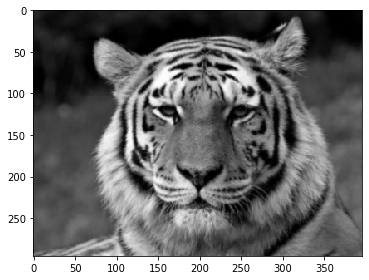

In [21]:
# Гауссовская фильтрация.

import scipy.signal as signal
import numpy as np
from skimage.io import imshow, imread, imsave
from skimage import img_as_float, img_as_ubyte
import math


def gauss(s, x, y):
    
    return (1 / ((2 * math.pi) * s ** 2)) * math.exp((- x ** 2 - y ** 2) / (2 * s ** 2))

sigma = 0.66
a = int(round(sigma*6)+1)

arr = []
for x in range(-int(a // 2), int(a // 2) + 1):
    for y in range(-int(a // 2), int(a // 2) + 1):
        arr.append(gauss(sigma, x, y))
import numpy as np

arr = np.array(arr).reshape((a, a))
arr = arr / arr.sum()

img = imread('tiger-gray-small.png')

imshow((signal.convolve2d(img, arr, mode='valid').astype('uint8')))

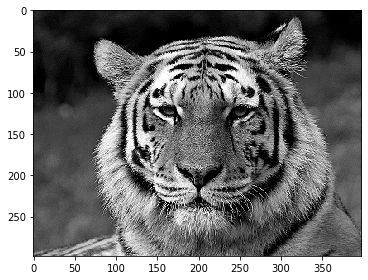

In [41]:
# Повышение резкости изображения (не цветного как я понял)

import scipy.signal as signal
import numpy as np
from skimage.io import imshow, imread, imsave
from skimage import img_as_float, img_as_ubyte, img_as_uint, img_as_int
import math


core = np.array([[-1, -2, -1], [-2, 22, -2], [-1, -2, -1]]) / 10

img = imread('tiger-gray-small (1).png')

img_two = imread('unsharp-tiger.png')

img_new = np.clip(signal.correlate2d(img, core, mode='valid'), 0, 255).astype('uint8')

imshow(img_new) # но с фото из задания не сходится






In [71]:
# Повышение резкости изображения (не цветного как я понял)
# попробуем в цикле

import scipy.signal as signal
import numpy as np
from skimage.io import imshow, imread, imsave
from skimage import img_as_float, img_as_ubyte, img_as_uint, img_as_int
import math


'''Наконец я выработал последовательность, чтобы мои результаты фильтрации сходились с решением:

- создай нулевой массив с dtype=np.uint8

- вычисли новое значение пиксела (адрес пиксела в выходном изображении - адрес левого верхнего угла фильтра при наложении на исходник)

- //1, чтобы получить floor'нутое целое

- обрежь clip'ом

- запиши в выходной массив'''

core = np.array([[-1, -2, -1], [-2, 22, -2], [-1, -2, -1]]) / 10

img_final = []

img = imread('tiger-gray-small (1).png')

finish_row,  finish_column= img.shape[0], img.shape[1]

img_two = imread('unsharp-tiger.png')

for row in range(finish_row):
    temp_arr = []
    for column in range(finish_column):
        start_row = row
        end_row = start_row + 3
        start_column = column
        end_column = start_column + 3
        if end_row > finish_row or end_column > finish_column:
            continue 
        temp_cell = np.clip((img[start_row: end_row, start_column: end_column] * core).sum(), 0, 255)                            
        temp_arr.append(temp_cell)
    if temp_arr:     
        img_final.append(np.array(temp_arr, dtype='uint8'))
    
img_final = np.array(img_final, dtype='uint8')








True

In [78]:
# Повышение резкости изображения, пример с кошкой

import scipy.signal as signal
import numpy as np
from skimage.io import imshow, imread, imsave
from skimage import img_as_float, img_as_ubyte, img_as_uint, img_as_int
from skimage.color import rgb2gray
import math


core = np.array([[-1, -2, -1], [-2, 22, -2], [-1, -2, -1]]) / 10

img = imread('b828b7f5c05b95b213a513040c132efd.jpg')

img = rgb2gray(img)

#imshow(img)

img_new = img_as_ubyte(np.clip(signal.convolve2d(img, core, mode='valid'), 0, 1))

imsave('cate_sharp.png', img_new) # но с фото из задания не сходится


C:\Users\AmanovRA\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\AmanovRA\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


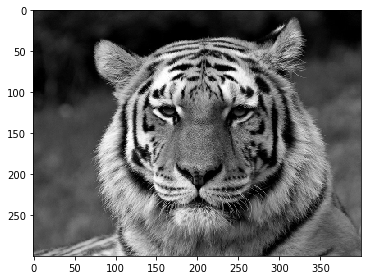

In [12]:
# Медианный фильтр

import scipy.signal as signal
import numpy as np
from skimage.io import imshow, imread, imsave
from skimage import img_as_float, img_as_ubyte, img_as_uint, img_as_int
from skimage.color import rgb2gray
import math


img_final = []

img = imread('tiger-gray-small (1).png')

imshow(img)

finish_row,  finish_column = img.shape[0], img.shape[1]

for row in range(finish_row):
    temp_arr = []
    for column in range(finish_column):
        start_row = row
        end_row = start_row + 7
        start_column = column
        end_column = start_column + 7
        if end_row > finish_row or end_column > finish_column:
            continue 
        temp_cell = np.median(img[start_row: end_row, start_column: end_column])                         
        temp_arr.append(temp_cell)
    if temp_arr:     
        img_final.append(np.array(temp_arr, dtype='uint8'))
    
img_final = np.array(img_final, dtype='uint8')



In [28]:
# Медианный фильтр

#вроде как еще можно просто менять центральный пиксель

import scipy.signal as signal
import numpy as np
from skimage.io import imshow, imread, imsave
from skimage import img_as_float, img_as_ubyte, img_as_uint, img_as_int
from skimage.color import rgb2gray
import math




img = imread('tiger-gray-small (1).png')
img_final = img.copy()



finish_row,  finish_column = img.shape[0], img.shape[1]

for row in range(0, finish_row, 7):
    temp_arr = []
    for column in range(0, finish_column, 7):
        start_row = row
        end_row = start_row + 7
        start_column = column
        end_column = start_column + 7
        if end_row > finish_row or end_column > finish_column:
            continue
        temp_cell = img_final[start_row: end_row, start_column: end_column]
        temp_cell[3, 3] = np.median(temp_cell)
        
imsave('median_with_replacement.png', img_final)        

    